# Homework


1. Розробити власний REST API сервер, який буде приймати три типи запитів ["GET", "POST", "DELETE"].

2. Запит POST за адресою ```http://localhost:<port>/api/add_record/<record>``` повинен додавати вказаний запис та повертати відповідь: New added record: ```<record>```

3. Запит GET за адресою ```http://localhost:<port>/api/last_10_records``` повинен відображати 10 останніх доданих записів в форматі json:
```JSON
 {'last 10 added records': [r1, r2, r3 ...]}
```
1. Запит DELETE за адресою ```http://localhost:<port>/api/delete_record/<record>``` повинен видаляти вказаний запис та повертати відповідь: Removed record: ```<record>```

2. Цей код описати в файлі main.py

3. Після успішного тестування розробленого API сервера, описати Dockerfile на базі Linux в якому потрібно встановити Python3, додати робочу папку code і цю папку перемістити код main.py

4. Запустити контейнер та виконати будь який запит для перевірки роботи REST API сервера


# Solution 
<hr/>

## Preparation
For realising REAST API server i chosed FAST API and UVICORN 

Lets download it


In [ ]:
# !pip install fastapi
# !pip install uvicorn

## Add some code in ```main.py```

In [1]:
from fastapi import FastAPI, HTTPException

app = FastAPI()

records = []

@app.post("/api/add_record/{record}")
async def add_record(record: str):
    records.append(record)
    return {"message": f"New added record: {record}"}

@app.get("/api/last_10_records")
async def last_10_records():
    last_10 = records[-10:]
    return {"Last 10 added records": last_10}

@app.delete("/api/delete_record/{record}")
async def delete_record(record: str):
    if record in records:
        records.remove(record)
        return {"message": f"Removed record: {record}"}
    else:
        raise HTTPException(status_code=404, detail=f"Record {record} not found")

## Create ```requirements.txt```
``` requirements.txt
fastapi
uvicorn


## Create docker image using:
```CMD
docker build -t myapi .
```

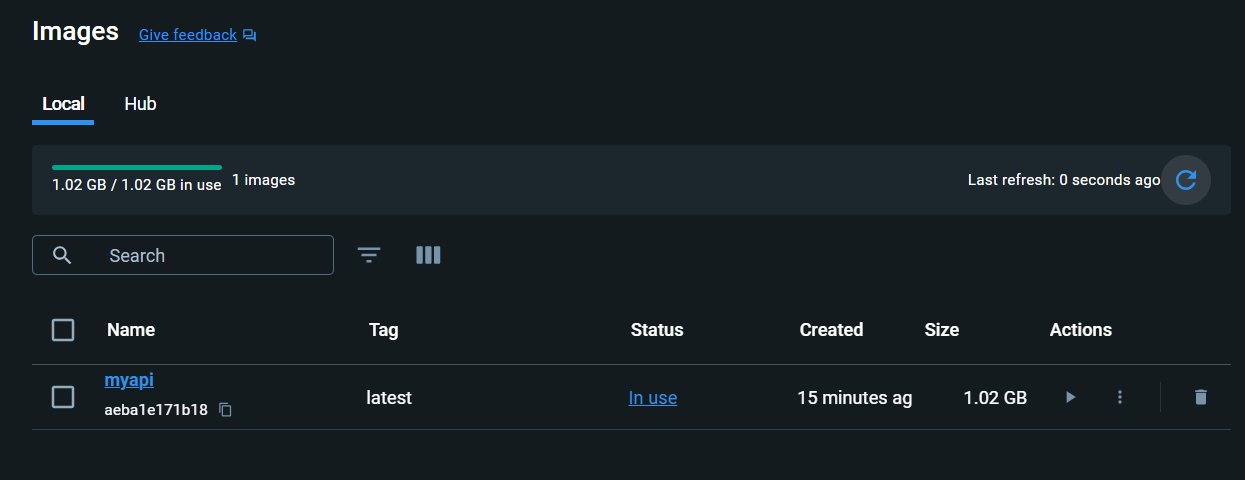


and run container by:

```CMD
docker run -d --name myapi-container -p 8000:8000 myapi
```

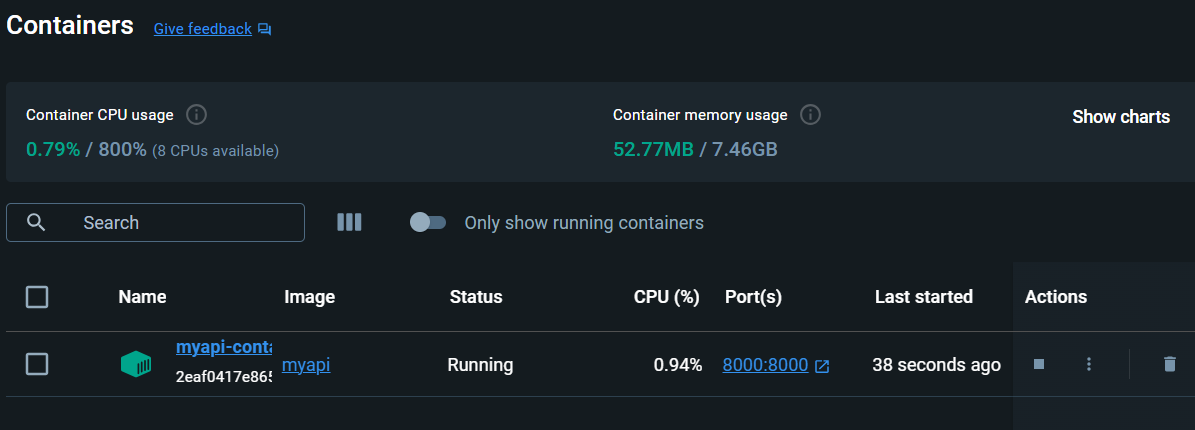

## Simple API works fine

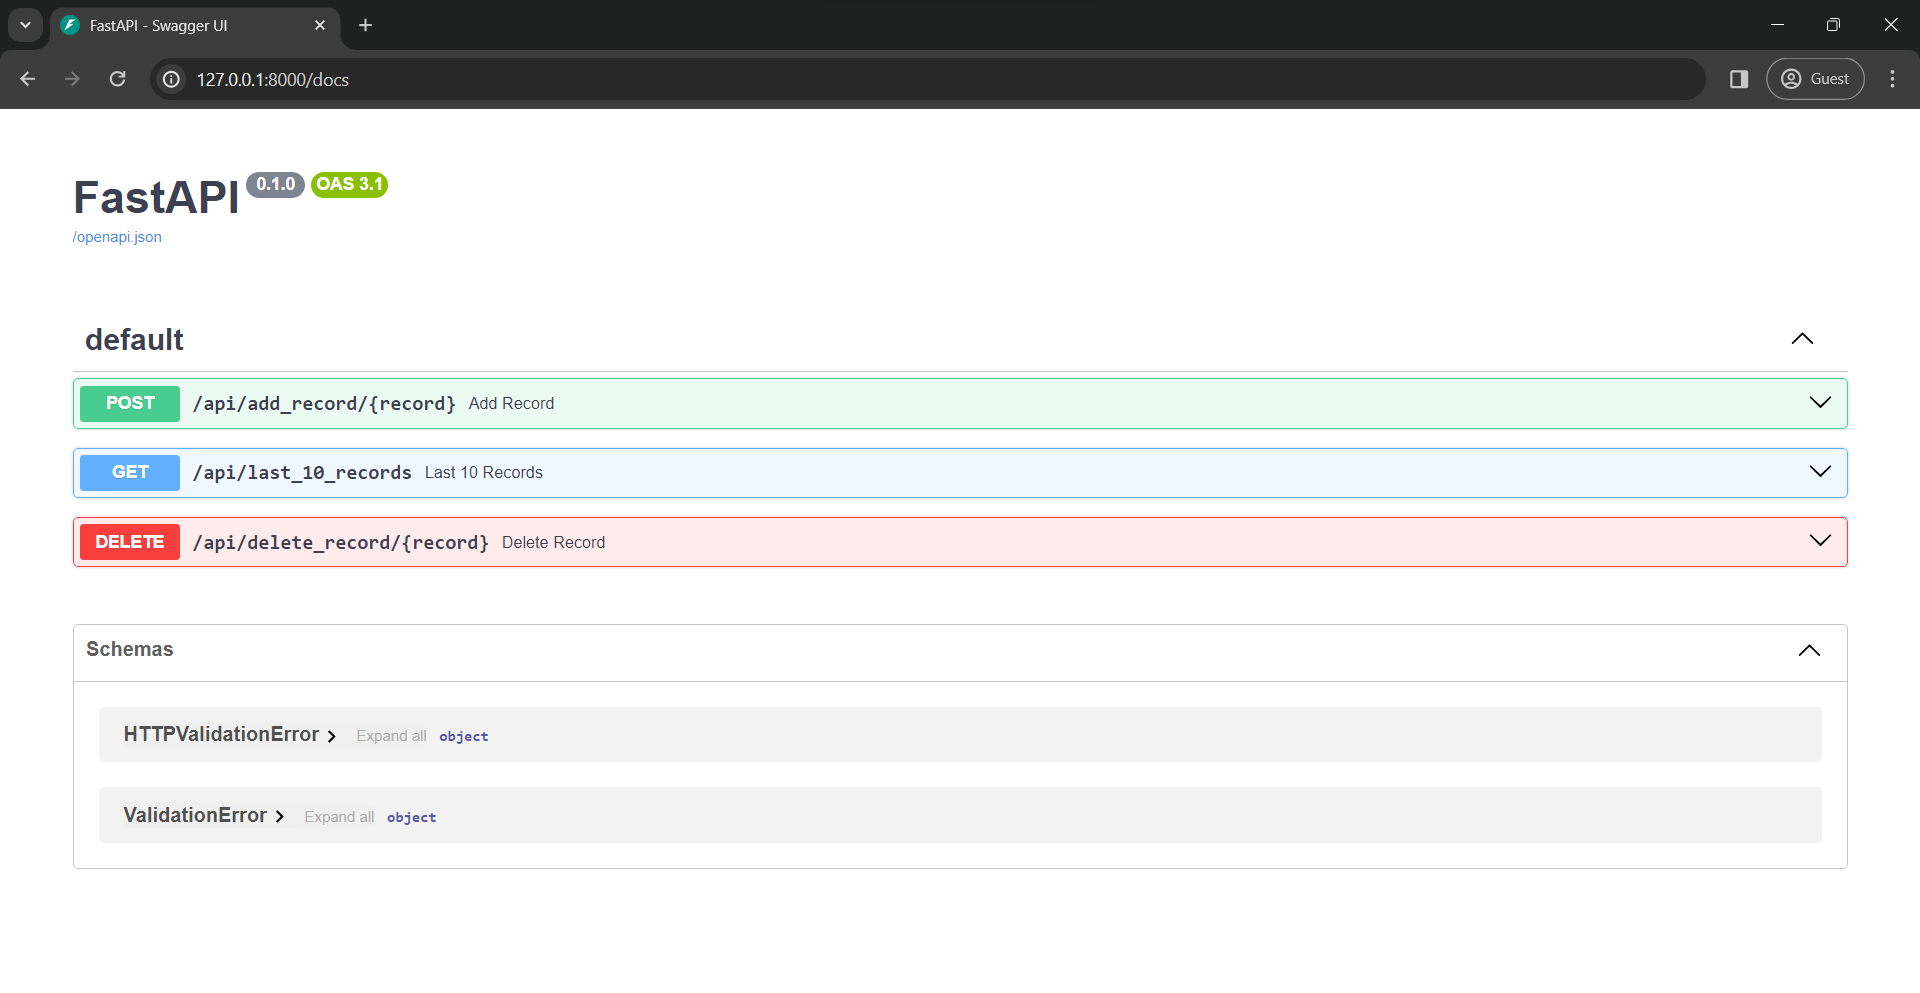

## Creating ```README.md```
Located in directory
